In [26]:
import pandas as pd

df = pd.read_excel('khang.xlsx')

df.head()

,name,unix_time,value,confidence,date,person,activity,stress_lvl
0,HeartRate,1706035099,150.0,100.0,2024-01-23 19:38:00,Khang,Chill,0.0
1,HeartRate,1706035105,187.0,0.0,2024-01-23 19:38:00,Khang,Chill,NaN
2,HeartRate,1706035110,52.0,0.0,2024-01-23 19:38:00,Khang,Chill,NaN
3,HeartRate,1706035115,76.0,0.0,2024-01-23 19:38:00,Khang,Chill,NaN
4,HeartRate,1706035120,45.0,0.0,2024-01-23 19:38:00,Khang,Chill,NaN


In [27]:
df.drop(columns=['name', 'date'], inplace=True)

df.head()

,unix_time,value,confidence,person,activity,stress_lvl
0,1706035099,150.0,100.0,Khang,Chill,0.0
1,1706035105,187.0,0.0,Khang,Chill,NaN
2,1706035110,52.0,0.0,Khang,Chill,NaN
3,1706035115,76.0,0.0,Khang,Chill,NaN
4,1706035120,45.0,0.0,Khang,Chill,NaN


In [28]:
df = df.sort_values(by='unix_time')

df.head()

,unix_time,value,confidence,person,activity,stress_lvl
0,1706035099,150.0,100.0,Khang,Chill,0.0
1,1706035105,187.0,0.0,Khang,Chill,NaN
2,1706035110,52.0,0.0,Khang,Chill,NaN
3,1706035115,76.0,0.0,Khang,Chill,NaN
4,1706035120,45.0,0.0,Khang,Chill,NaN


In [94]:
df_interpolate = df.copy()
df_interpolate['stress_lvl'] = df_interpolate['stress_lvl'].interpolate(method="linear")

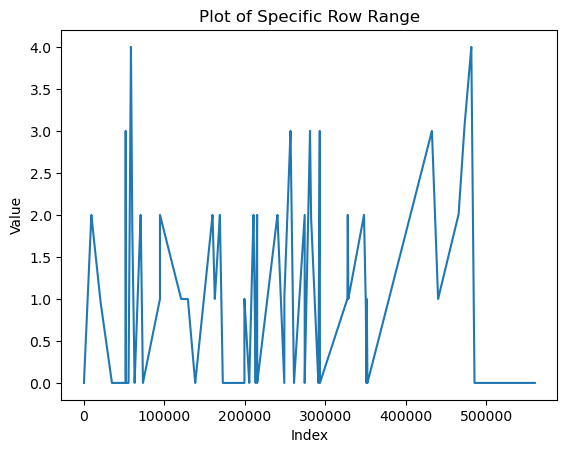

In [95]:
import matplotlib.pyplot as plt

plt.plot(df_interpolate['stress_lvl'])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of Specific Row Range')
plt.show()